# Imports

In [47]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
from haversine import haversine

In [48]:
class City:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y
    
    def distance(self, city):
        distance = haversine((self.x, self.y), (city.x, city.y))
        return distance
    
    def __repr__(self):
        return "(" + str(self.name) + "," + str(self.x) + "," + str(self.y) + ")"

In [49]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [50]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [51]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [52]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [53]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [54]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [55]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [56]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [57]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [58]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [59]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [60]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [61]:
cityList = []

cityList.append(City('Parque Barigui',-25.4227643,-49.2982402))
cityList.append(City('Praça Himeji',-25.417052,-49.284218))
cityList.append(City('Memorial Ucraniano',-25.4080748,-49.307594))
cityList.append(City('Passeio Público',-25.4225115,-49.2692025))
cityList.append(City('Museu Egípcio e Rosacruz Tutankhamon',-25.4185763,-49.2686276))
cityList.append(City('Museu Oscar Niemeyer',-25.4304207,-49.3135014))
cityList.append(City('Bosque Alemão',-25.4211749,-49.3103135))
cityList.append(City('Bosque Santa Paula',-25.4405695,-49.3106117))
cityList.append(City('Parque Vista Alegre',-25.4106347,-49.3132573))
cityList.append(City('Parque Bacacheri - Boa Vista - PR',-25.3926211,-49.2464161))


In [75]:
best_route = geneticAlgorithm(population=cityList, popSize=100, eliteSize=6, mutationRate=0.01, generations=30)

Initial distance: 24.734434192713966
Final distance: 20.064644247516227


In [63]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

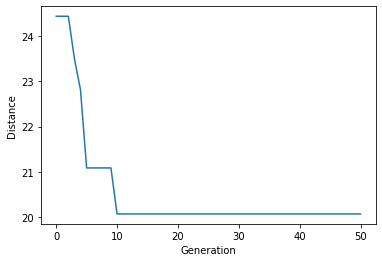

In [74]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=6, mutationRate=0.01, generations=50)

In [76]:
for i in range(0, len(best_route)):
    print(best_route[i])

(Bosque Santa Paula,-25.4405695,-49.3106117)
(Museu Oscar Niemeyer,-25.4304207,-49.3135014)
(Bosque Alemão,-25.4211749,-49.3103135)
(Parque Vista Alegre,-25.4106347,-49.3132573)
(Memorial Ucraniano,-25.4080748,-49.307594)
(Parque Bacacheri - Boa Vista - PR,-25.3926211,-49.2464161)
(Museu Egípcio e Rosacruz Tutankhamon,-25.4185763,-49.2686276)
(Passeio Público,-25.4225115,-49.2692025)
(Praça Himeji,-25.417052,-49.284218)
(Parque Barigui,-25.4227643,-49.2982402)


In [89]:
import folium

brasil = folium.Map(
    location=[-25.4225115,-49.2692025],    # Coordenadas retiradas do Google Maps
    zoom_start=13
)

for i in range(0, len(best_route)):
    folium.Marker(
        location=[best_route[i].x, best_route[i].y],
        popup=best_route[i].name
    ).add_to(brasil)

In [90]:
locations = [(item.x, item.y) for item in best_route]

folium.PolyLine(locations,
                color='blue',
                weight=5,
                opacity=0.8).add_to(brasil)

In [91]:
brasil